Valor mínimo del error: 0.000449009164394


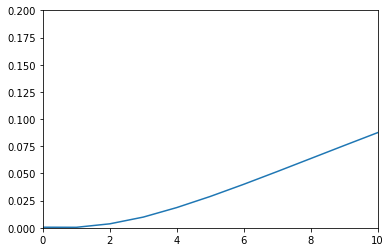

In [21]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as pt
import random
from sklearn import linear_model as lin
from sklearn.cross_validation import train_test_split 

#Error cuadratico medio
def errorCM(ws, xs, ys):
    res = 0
#Recordar que .shape me da el vector con las dimensiones (Filas y Columnas del arreglo)
#y .iloc me transforma los índices en enteros
    for i in range (0,xs.shape[0]):
        y = ws[0] + (ws[1:] * xs.iloc[i]).sum()
        res += y - ys.iloc[i]
    return (res/xs.shape[0])**2
#Genero el dataframe
df = pd.read_csv("regLinPoli.txt")
#Divido mi conjunto de datos
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

#Estandarizo
X_train = (X_train - X_train.mean()) / X_train.std()
Y_train = (Y_train - Y_train.mean()) / Y_train.std()

#Defino los parámetros a utilizar
eta = 0.01
x0 = 1
rmax = 3

#Regularizamos e iteramos sobre el shrinkage parameter l
ldom = np.arange(0,0.1,0.002)
err = []

for l in ldom:
    ws = [random.randint(0,rmax) for i in range (0,X_train.shape[1] + 1)]
    for i in range (0,X_train.shape[0]):
        v = ws[0]*x0 + (ws[1:]*X_train.iloc[i]).sum()
        t = (Y_train.iloc[i] - v)
        ws[0] = (ws[0]) + x0 * t
        ws[1:] = [(ws[j]) + (X_train.iloc[i].iloc[j-1] * t * eta) - (ws[j] * l) for j in range(1,len(ws))]
    err.append(errorCM(ws,X_train,Y_train))

print "Valor mínimo del error: " + str(min(err))
pt.plot(err)
axes = pt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,.2])
pt.show()